In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [ ]:
from google.colab import files
store=files.upload()

Saving Cardekho Dataset.xlsx to Cardekho Dataset.xlsx


In [ ]:
store = pd.read_excel('Cardekho Dataset.xlsx')
store.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [ ]:
store.shape

(8128, 12)

In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [ ]:
(store.isnull().sum()/len(store))*100

,0
name,0.000000
year,0.000000
selling_price,0.000000
km_driven,0.000000
fuel,0.000000
seller_type,0.000000
transmission,0.000000
owner,0.000000
mileage(km/ltr/kg),2.718996
engine,2.718996


In [ ]:
store['max_power'] = store['max_power'].replace({" ": np.NaN})

In [ ]:
store.dropna(inplace=True)

In [ ]:
(store.isnull().sum()/len(store))*100

,0
name,0.0
year,0.0
selling_price,0.0
km_driven,0.0
fuel,0.0
seller_type,0.0
transmission,0.0
owner,0.0
mileage(km/ltr/kg),0.0
engine,0.0


In [ ]:
store.shape

(7906, 12)

In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                7906 non-null   object 
 1   year                7906 non-null   int64  
 2   selling_price       7906 non-null   int64  
 3   km_driven           7906 non-null   int64  
 4   fuel                7906 non-null   object 
 5   seller_type         7906 non-null   object 
 6   transmission        7906 non-null   object 
 7   owner               7906 non-null   object 
 8   mileage(km/ltr/kg)  7906 non-null   float64
 9   engine              7906 non-null   float64
 10  max_power           7906 non-null   float64
 11  seats               7906 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 803.0+ KB


In [ ]:
store.drop(columns=['name'], inplace=True)

In [ ]:
store['year'] = store['year'].astype('object')
store.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [ ]:
cat_cols = ['year','fuel','seller_type','transmission','owner']
num_cols = ['selling_price','km_driven','mileage(km/ltr/kg)','engine','max_power','seats']

Inspecting Target variable

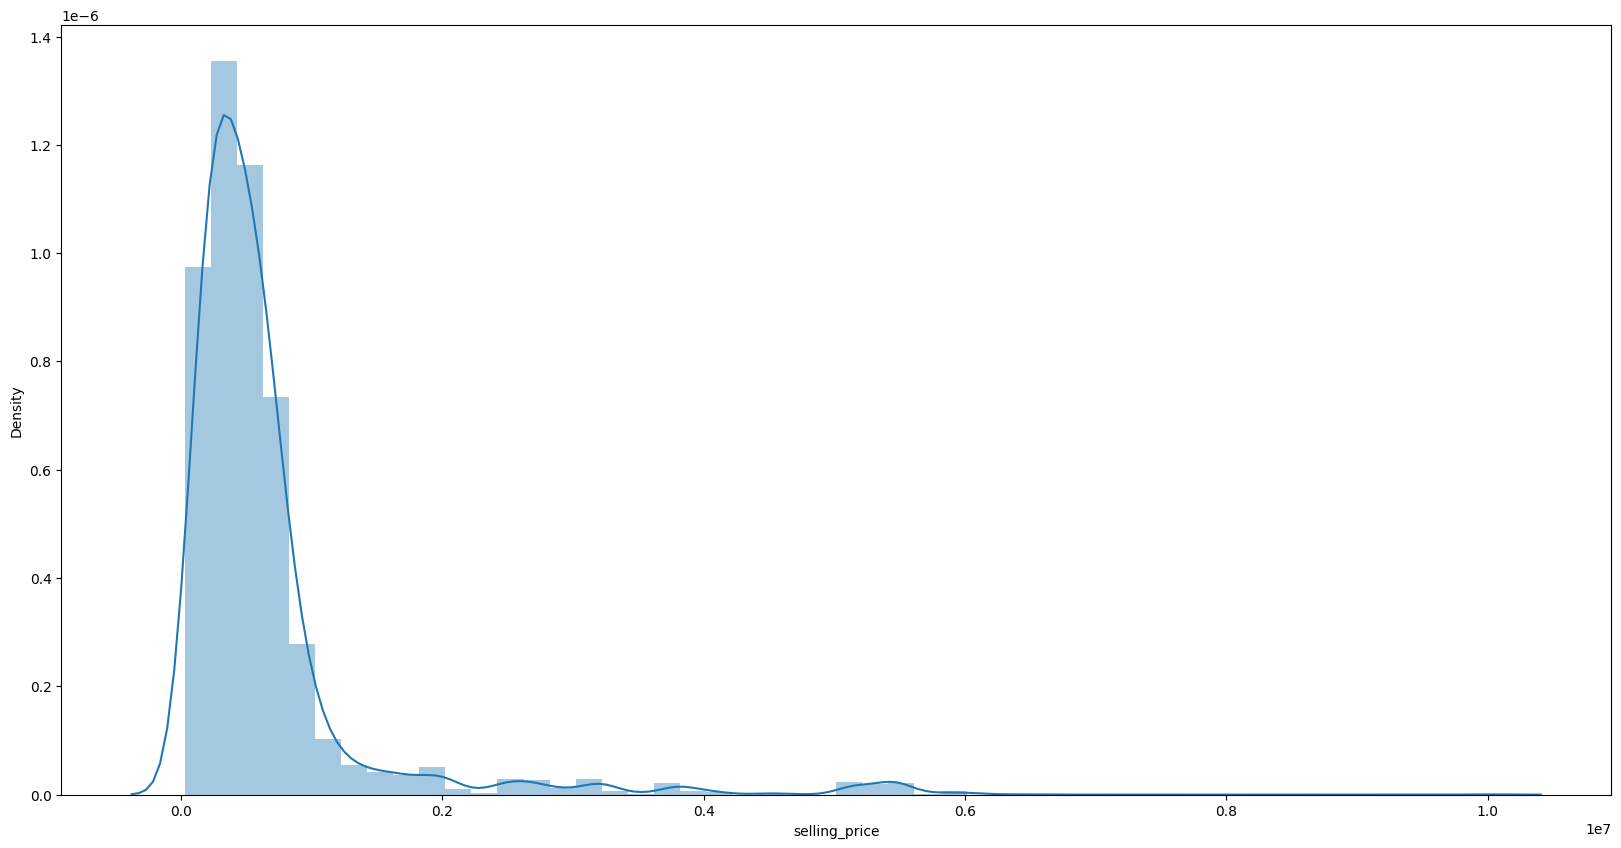

In [ ]:
plt.figure(figsize = [20,10])

sns.distplot(store['selling_price'])
plt.show()

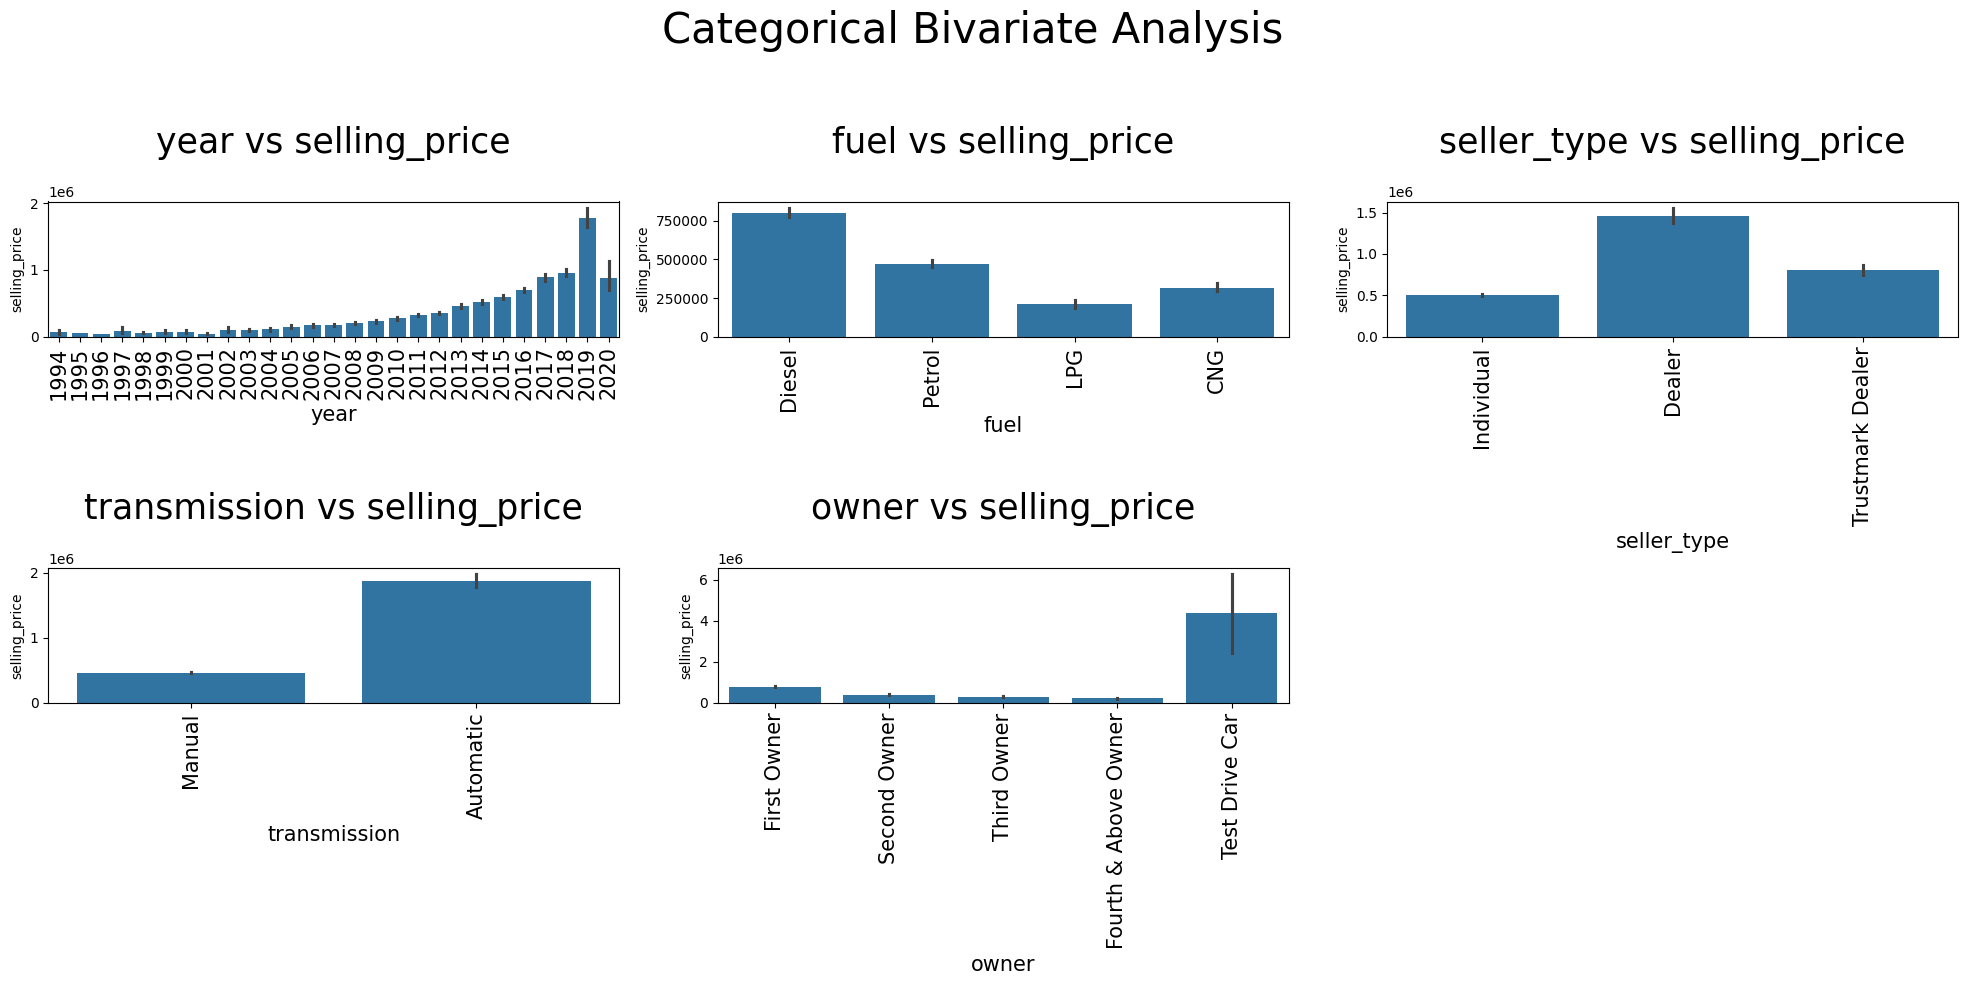

In [ ]:
plt.figure(figsize = [20,10])
plt.suptitle('Categorical Bivariate Analysis\n', fontsize=30)
i=1
for col in cat_cols:
        plt.subplot(2,3,i)
        sns.barplot(x=store[col],y=store['selling_price'])
        plt.title(f'{col} vs selling_price\n', fontdict={'size':25})
        plt.xlabel(col, size=15)
        plt.xticks(size=15, rotation=90)
        i+=1


plt.tight_layout()
plt.show()

Analysis of Numeric Variables

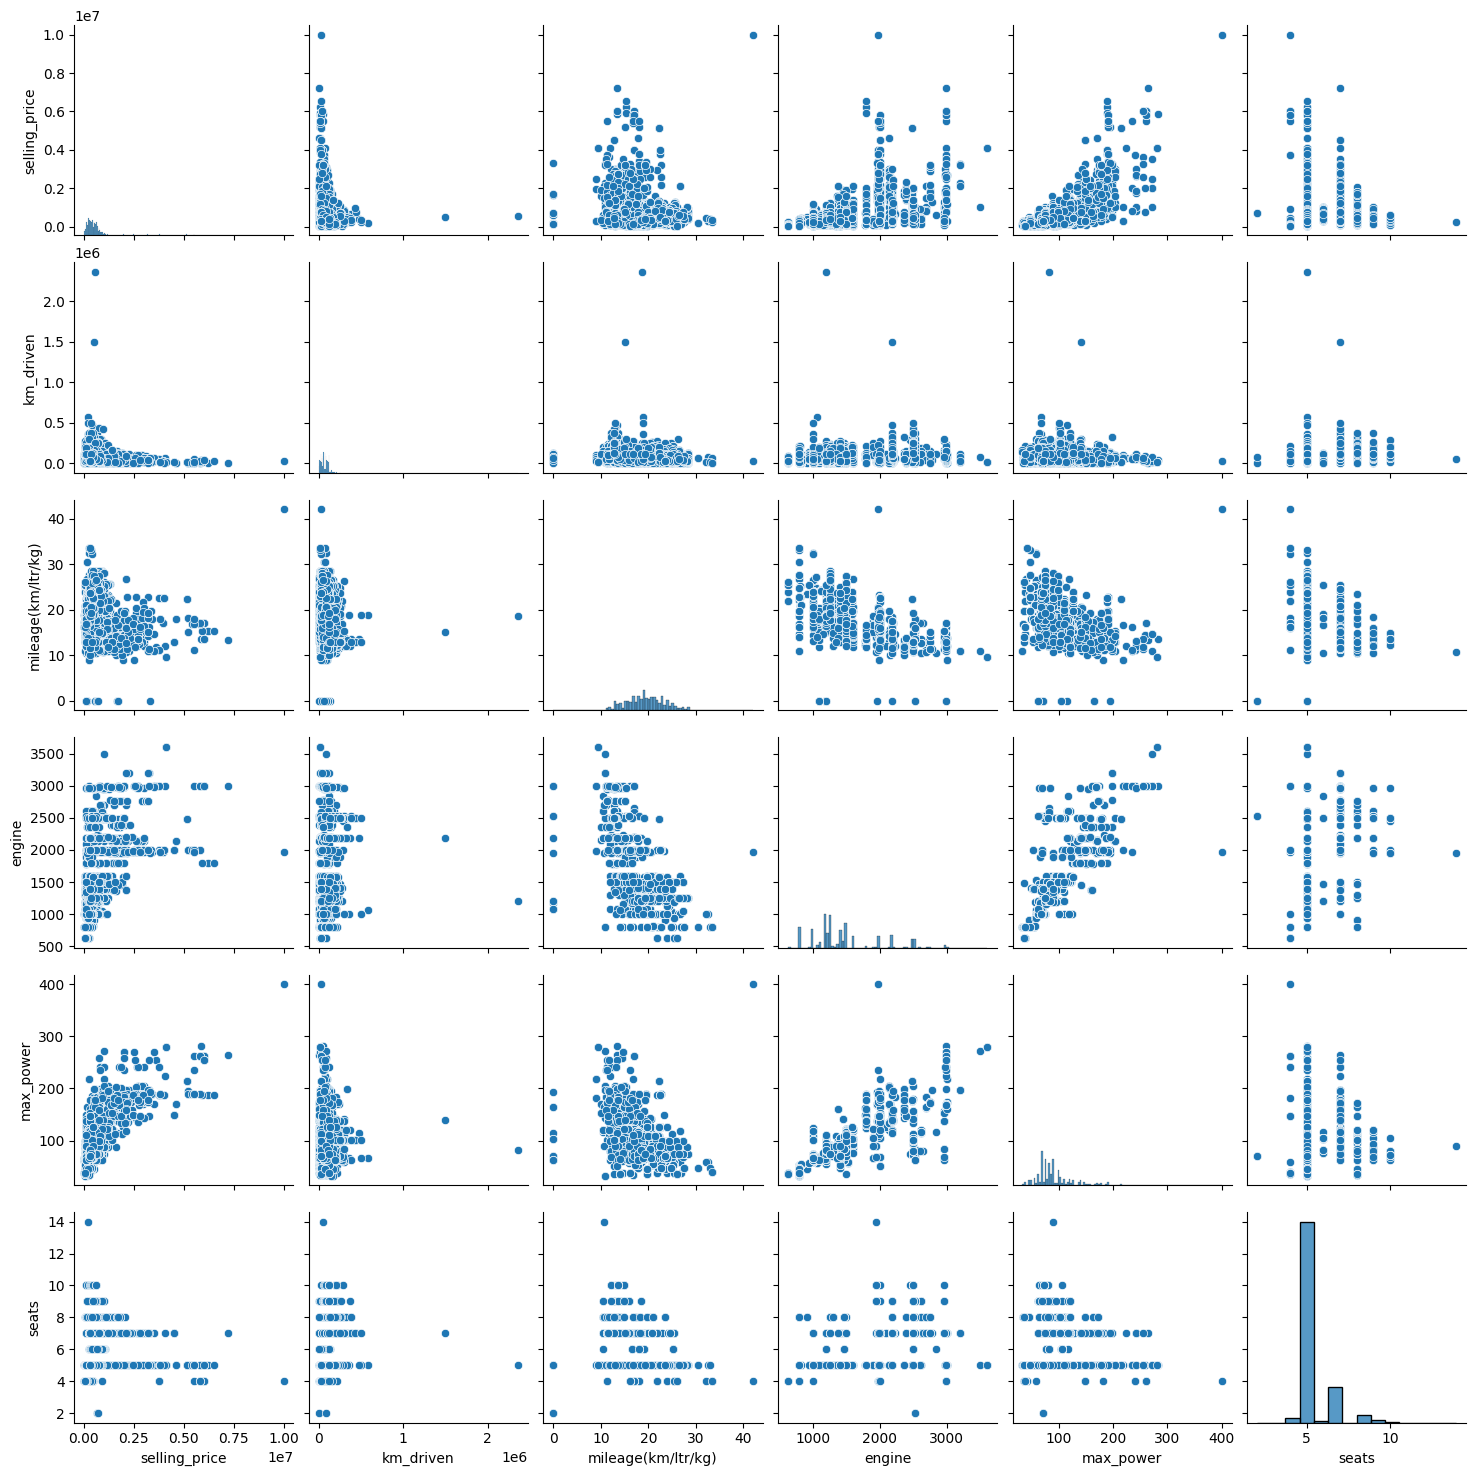

In [ ]:
sns.pairplot(store[num_cols])
plt.show()

<Axes: >

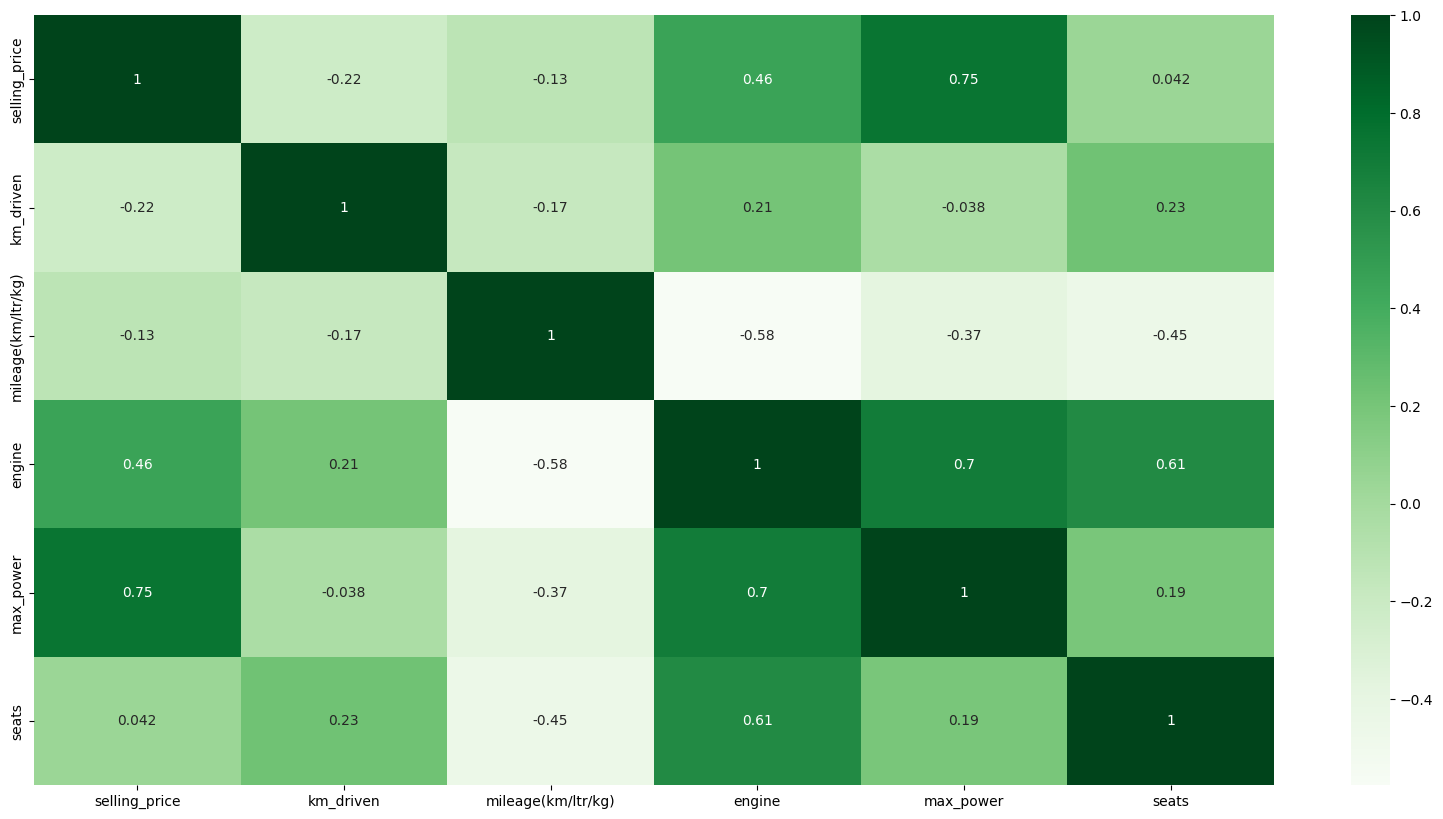

In [ ]:
plt.figure(figsize = [20,10])
sns.heatmap(store.corr(numeric_only=True),cmap='Greens', annot=True) # Added numeric_only=True

In [ ]:
store.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [ ]:
store1 = pd.get_dummies(store)

In [ ]:
store1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Columns: 2398 entries, year to max_power_ 
dtypes: bool(2392), float64(3), int64(3)
memory usage: 18.9 MB


In [ ]:
store1.head()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 DSZ AC PS,name_Ambassador Grand 1500 DSZ BSIII,name_Ambassador Grand 2000 DSZ PW CL,...,max_power_254.8,max_power_258,max_power_261.4,max_power_265,max_power_270.9,max_power_272,max_power_280,max_power_282,max_power_400,max_power_
0,2014,450000,145500,23.40,1248.0,5.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2014,370000,120000,21.14,1498.0,5.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2006,158000,140000,17.70,1497.0,5.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2010,225000,127000,23.00,1396.0,5.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2007,130000,120000,16.10,1298.0,5.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
